# Histograms

* https://www.cambridgeincolour.com/tutorials/histograms1.htm

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Histograms with OpenCV

In [3]:
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

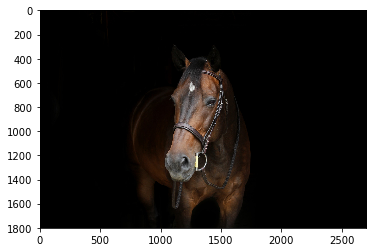

In [4]:
plt.imshow(show_horse)

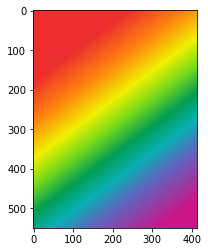

In [8]:
plt.imshow(show_rainbow)

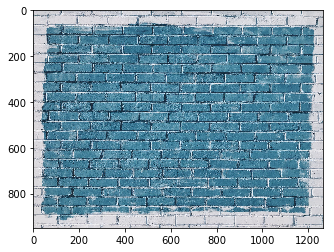

In [9]:
plt.imshow(show_bricks)

# OpenCV Histograms

In [11]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [12]:
hist_values.shape

(256, 1)

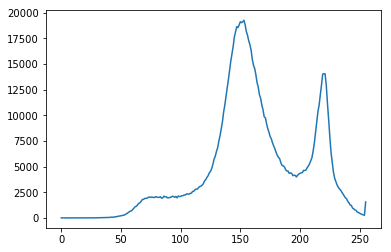

In [13]:
plt.plot(hist_values)

In [14]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

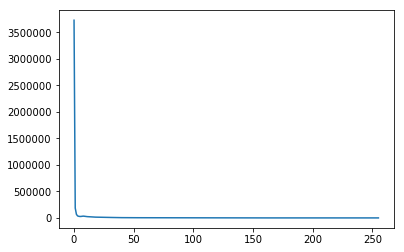

In [15]:
plt.plot(hist_values)

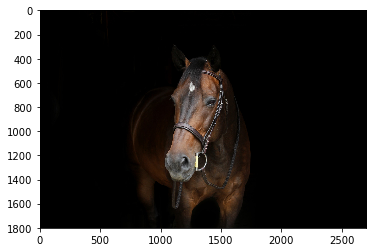

In [16]:
plt.imshow(show_horse)

# Ploting 3 Color Histograms

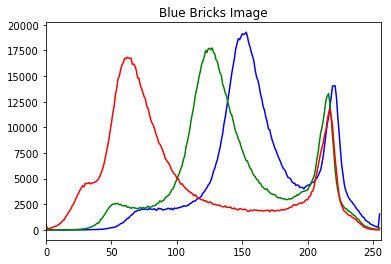

In [18]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

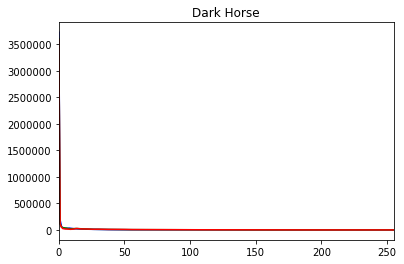

In [22]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.title('Dark Horse')
plt.show()

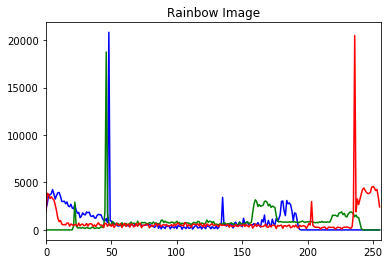

In [23]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

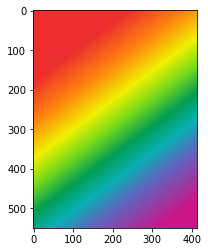

In [24]:
plt.imshow(show_rainbow)

# Masking

In [25]:
img = rainbow

In [26]:
img.shape

(550, 413, 3)

In [27]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400] = 255

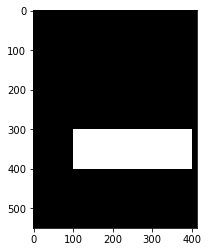

In [28]:
plt.imshow(mask,cmap='gray')

In [29]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

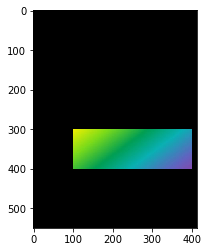

In [30]:
plt.imshow(show_masked_img)

In [32]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'Histogram for RED values of the full image')

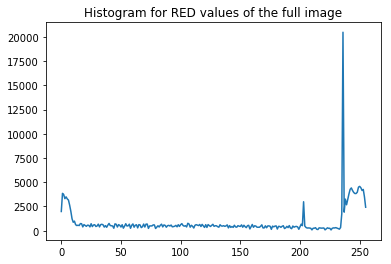

In [33]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5,1,'Histogram for RED values of the Masked Area')

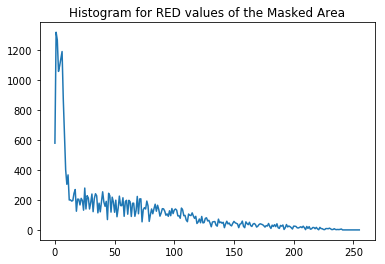

In [34]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values of the Masked Area')

# Histogram Equalization 
* https://en.wikipedia.org/wiki/Histogram_equalization

In [36]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [37]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    

# Single Channel (Grayscale)

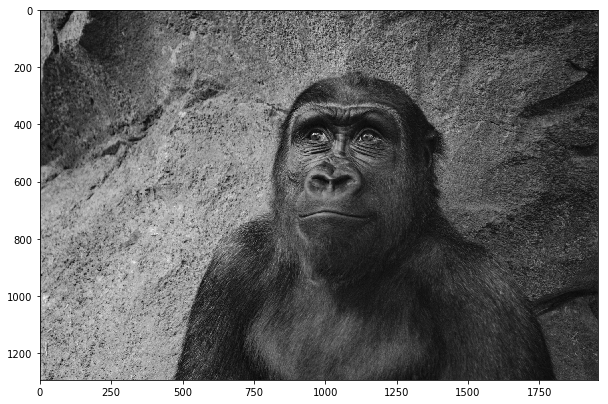

In [38]:
display(gorilla,cmap='gray')

In [39]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

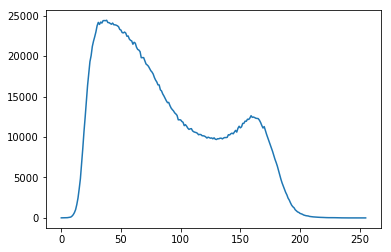

In [40]:
plt.plot(hist_values)

In [41]:
eq_gorilla =cv2.equalizeHist(gorilla)

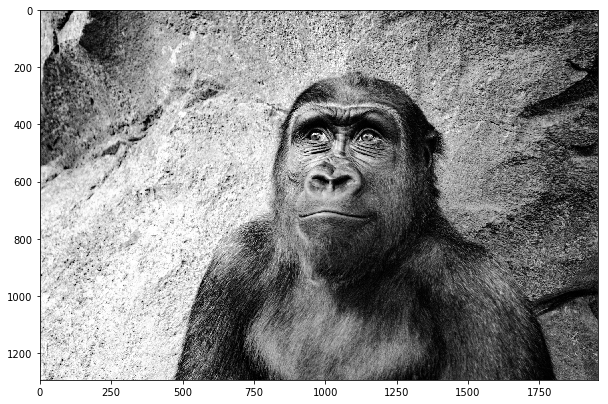

In [42]:
display(eq_gorilla,cmap='gray')

In [43]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

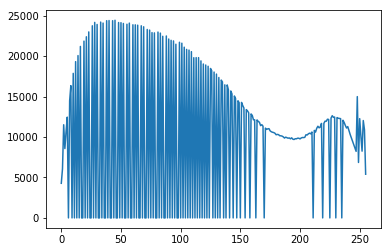

In [44]:
plt.plot(hist_values)

# Corol Image

In [46]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

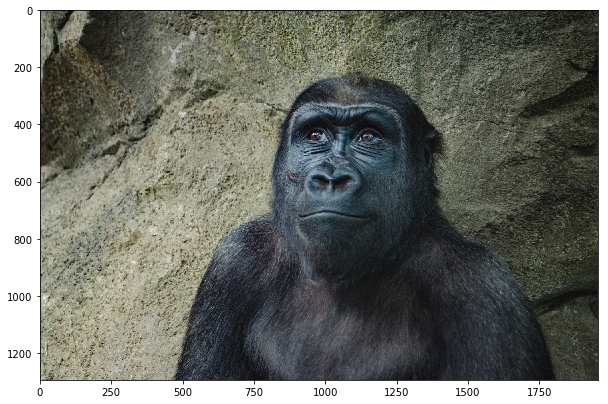

In [48]:
display(show_gorilla)

In [49]:
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [50]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

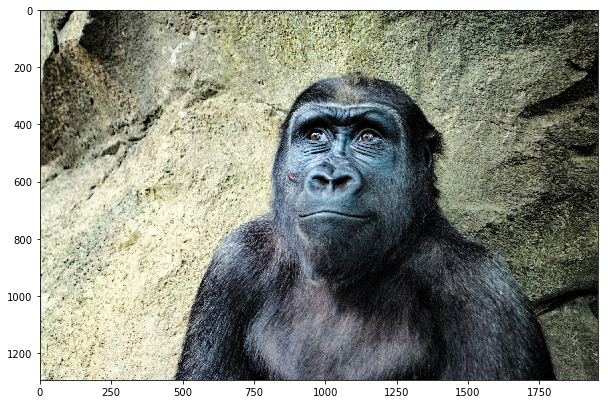

In [52]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)